<a href="https://colab.research.google.com/github/aksoy1/Aksoy/blob/main/Company10K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install transformers torch

In [ ]:
!pip install transformers torch --quiet

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# User-Agent required by SEC
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define companies in Automobiles & Components industry group with GICS
companies = [
    {'ticker': 'APTV', 'name': 'Aptiv'},
    {'ticker': 'F', 'name': 'Ford Motor Company'},
    {'ticker': 'GM', 'name': 'General Motors'},
    {'ticker': 'TSLA', 'name': 'Tesla, Inc.'},
]

# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Download function
def fetch_10k_data(ticker, company_name):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Build 10-K URL
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to local file
                filename = f"{ticker}_10K_{report_date.replace(' ', '_')}.txt"
                with open(filename, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,

                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Run download loop
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"])
    results.append(result)

# Create DataFrame
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date"
]]
final_df

In [ ]:
# Save CSV
final_df.to_csv("Automobiles & Components_10k_metadata.csv", index=False)

# Download CSV
from google.colab import files
files.download("Automobiles & Components_10k_metadata.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# User-Agent required by SEC
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define companies in Banks industry group with GICS

companies = [
    {'ticker': 'BAC', 'name': 'Bank of America Corp.'},
    {'ticker': 'C', 'name': 'Citigroup Inc.'},
    {'ticker': 'CFG', 'name': 'Citizens Financial Group'},
    {'ticker': 'FITB', 'name': 'Fifth Third Bancorp'},
    {'ticker': 'HBAN', 'name': 'Huntington Bancshares'},
    {'ticker': 'JPM', 'name': 'JPMorgan Chase & Co.'},
    {'ticker': 'KEY', 'name': 'KeyCorp'},
    {'ticker': 'MTB', 'name': 'M&T Bank Corporation'},
    {'ticker': 'PNC', 'name': 'PNC Financial Services'},
    {'ticker': 'RF', 'name': 'Regions Financial Corporation'},
    {'ticker': 'TFC', 'name': 'Truist Financial Corporation'},
    {'ticker': 'USB', 'name': 'U.S. Bancorp'},
    {'ticker': 'WFC', 'name': 'Wells Fargo & Co.'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Download function
def fetch_10k_data(ticker, company_name):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Build 10-K URL
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to local file
                filename = f"{ticker}_10K_{report_date.replace(' ', '_')}.txt"
                with open(filename, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,

                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Run download loop
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"])
    results.append(result)

# Create DataFrame
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date"
]]
final_df
# Save CSV
final_df.to_csv("Banks_10k_metadata.csv", index=False)

# Download CSV
from google.colab import files
files.download("Banks_10k_metadata.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# User-Agent required by SEC
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define companies in Capital Goods industry group with GEICS

companies = [
    {'ticker': 'AOS', 'name': 'A. O. Smith', 'gics_code': '20102010'},
    {'ticker': 'ALLE', 'name': 'Allegion', 'gics_code': '20102010'},
    {'ticker': 'AXON', 'name': 'Axon Enterprise', 'gics_code': '20101010'},
    {'ticker': 'BA', 'name': 'Boeing', 'gics_code': '20101010'},
    {'ticker': 'BLDR', 'name': 'Builders FirstSource', 'gics_code': '20102010'},
    {'ticker': 'CARR', 'name': 'Carrier Global', 'gics_code': '20102010'},
    {'ticker': 'GE', 'name': 'GE Aerospace', 'gics_code': '20101010'},
    {'ticker': 'GD', 'name': 'General Dynamics', 'gics_code': '20101010'},
    {'ticker': 'HWM', 'name': 'Howmet Aerospace', 'gics_code': '20101010'},
    {'ticker': 'HII', 'name': 'Huntington Ingalls Industries', 'gics_code': '20101010'},
    {'ticker': 'JCI', 'name': 'Johnson Controls', 'gics_code': '20102010'},
    {'ticker': 'LHX', 'name': 'L3Harris', 'gics_code': '20101010'},
    {'ticker': 'LII', 'name': 'Lennox International', 'gics_code': '20102010'},
    {'ticker': 'LMT', 'name': 'Lockheed Martin', 'gics_code': '20101010'},
    {'ticker': 'MAS', 'name': 'Masco', 'gics_code': '20102010'},
    {'ticker': 'NOC', 'name': 'Northrop Grumman', 'gics_code': '20101010'},
    {'ticker': 'RTX', 'name': 'RTX Corporation', 'gics_code': '20101010'},
    {'ticker': 'TXT', 'name': 'Textron', 'gics_code': '20101010'},
    {'ticker': 'TT', 'name': 'Trane Technologies', 'gics_code': '20102010'},
    {'ticker': 'TDG', 'name': 'TransDigm Group', 'gics_code': '20101010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Download function
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Build 10-K URL
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to local file
                filename = f"{ticker}_10K_{report_date.replace(' ', '_')}.txt"
                with open(filename, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code" : gics_code

                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Run download loop
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Create DataFrame
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
final_df
# Save CSV
final_df.to_csv("Capitalgoods(Gics_Code 2010)_10k_metadata.csv", index=False)

# Download CSV
from google.colab import files
files.download("Capitalgoods(Gics_Code 2010)_10k_metadata.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# User-Agent required by SEC
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define companies in Commercial & Professional Services industry group with GEICS

companies = [
    {'ticker': 'ADP', 'name': 'Automatic Data Processing', 'gics_code': '20202010'},
    {'ticker': 'BR', 'name': 'Broadridge Financial Solutions', 'gics_code': '20202030'},
    {'ticker': 'CTAS', 'name': 'Cintas', 'gics_code': '20201070'},
    {'ticker': 'CPRT', 'name': 'Copart', 'gics_code': '20201070'},
    {'ticker': 'DAY', 'name': 'Dayforce', 'gics_code': '20202010'},
    {'ticker': 'EFX', 'name': 'Equifax', 'gics_code': '20202020'},
    {'ticker': 'LDOS', 'name': 'Leidos', 'gics_code': '20201070'},
    {'ticker': 'PAYX', 'name': 'Paychex', 'gics_code': '20202010'},
    {'ticker': 'PAYC', 'name': 'Paycom', 'gics_code': '20202010'},
    {'ticker': 'RSG', 'name': 'Republic Services', 'gics_code': '20201050'},
    {'ticker': 'ROL', 'name': 'Rollins, Inc.', 'gics_code': '20201050'},
    {'ticker': 'VLTO', 'name': 'Veralto', 'gics_code': '20201050'},
    {'ticker': 'VRSK', 'name': 'Verisk Analytics', 'gics_code': '20202020'},
    {'ticker': 'WM', 'name': 'Waste Management', 'gics_code': '20201050'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Download function
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Build 10-K URL
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to local file
                filename = f"{ticker}_10K_{report_date.replace(' ', '_')}.txt"
                with open(filename, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code" : gics_code

                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Run download loop
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Create DataFrame
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
final_df
# Save CSV
final_df.to_csv("Commercial & Professional Services(Gics_Code 2020)_10k_metadata.csv", index=False)

# Download CSV
from google.colab import files
files.download("Commercial & Professional Services(Gics_Code 2020)_10k_metadata.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# User-Agent required by SEC
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define companies in Consumer Discretionary Distribution & Retail industry group with GEICS

companies = [
    {'ticker': 'AMZN', 'name': 'Amazon', 'gics_code': '25503030'},
    {'ticker': 'AZO', 'name': 'AutoZone', 'gics_code': '25504050'},
    {'ticker': 'BBY', 'name': 'Best Buy', 'gics_code': '25504020'},
    {'ticker': 'KMX', 'name': 'CarMax', 'gics_code': '25504050'},
    {'ticker': 'EBAY', 'name': 'eBay Inc.', 'gics_code': '25503030'},
    {'ticker': 'GPC', 'name': 'Genuine Parts Company', 'gics_code': '25501010'},
    {'ticker': 'HD', 'name': 'Home Depot (The)', 'gics_code': '25504030'},
    {'ticker': 'LKQ', 'name': 'LKQ Corporation', 'gics_code': '25501010'},
    {'ticker': 'LOW', 'name': "Lowe's", 'gics_code': '25504030'},
    {'ticker': 'ORLY', 'name': 'O’Reilly Automotive', 'gics_code': '25504050'},
    {'ticker': 'POOL', 'name': 'Pool Corporation', 'gics_code': '25501010'},
    {'ticker': 'ROST', 'name': 'Ross Stores', 'gics_code': '25504010'},
    {'ticker': 'TJX', 'name': 'TJX Companies', 'gics_code': '25504010'},
    {'ticker': 'TSCO', 'name': 'Tractor Supply', 'gics_code': '25504040'},
    {'ticker': 'ULTA', 'name': 'Ulta Beauty', 'gics_code': '25504040'},
    {'ticker': 'WSM', 'name': 'Williams-Sonoma, Inc.', 'gics_code': '25504060'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Download function
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Build 10-K URL
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to local file
                filename = f"{ticker}_10K_{report_date.replace(' ', '_')}.txt"
                with open(filename, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code" : gics_code

                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Run download loop
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Create DataFrame
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
final_df
# Save CSV
final_df.to_csv("Consumer Discretionary Distribution & Retail(Gics_Code 2550)_10k_metadata.csv", index=False)

# Download CSV
from google.colab import files
files.download("Consumer Discretionary Distribution & Retail(Gics_Code 2550)_10k_metadata.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# User-Agent required by SEC
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define companies in Consumer Durables & Apparel industry group with GEICS

companies = [
    {'ticker': 'DECK', 'name': 'Deckers Brands', 'gics_code': '25203020'},
    {'ticker': 'DHI', 'name': 'D. R. Horton', 'gics_code': '25201030'},
    {'ticker': 'GRMN', 'name': 'Garmin', 'gics_code': '25201010'},
    {'ticker': 'HAS', 'name': 'Hasbro', 'gics_code': '25202010'},
    {'ticker': 'LEN', 'name': 'Lennar', 'gics_code': '25201030'},
    {'ticker': 'LULU', 'name': 'Lululemon Athletica', 'gics_code': '25203010'},
    {'ticker': 'MHK', 'name': 'Mohawk Industries', 'gics_code': '25201020'},
    {'ticker': 'NKE', 'name': 'Nike, Inc.', 'gics_code': '25203010'},
    {'ticker': 'NVR', 'name': 'NVR, Inc.', 'gics_code': '25201030'},
    {'ticker': 'PHM', 'name': 'PulteGroup', 'gics_code': '25201030'},
    {'ticker': 'RL', 'name': 'Ralph Lauren Corporation', 'gics_code': '25203010'},
    {'ticker': 'TPR', 'name': 'Tapestry, Inc.', 'gics_code': '25203010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Download function
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Build 10-K URL
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to local file
                filename = f"{ticker}_10K_{report_date.replace(' ', '_')}.txt"
                with open(filename, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code" : gics_code

                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Run download loop
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Create DataFrame
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
final_df
# Save CSV
final_df.to_csv("Consumer Durables & Apparel(Gics_Code 2520)_10k_metadata.csv", index=False)

# Download CSV
from google.colab import files
files.download("Consumer Durables & Apparel(Gics_Code 2520)_10k_metadata.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# User-Agent required by SEC
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define companies in Consumer Services industry group with GEICS

companies = [
    {'ticker': 'ABNB', 'name': 'Airbnb', 'gics_code': '25301020'},
    {'ticker': 'BKNG', 'name': 'Booking Holdings', 'gics_code': '25301020'},
    {'ticker': 'CZR', 'name': 'Caesars Entertainment', 'gics_code': '25301010'},
    {'ticker': 'CCL', 'name': 'Carnival', 'gics_code': '25301020'},
    {'ticker': 'CMG', 'name': 'Chipotle Mexican Grill', 'gics_code': '25301040'},
    {'ticker': 'DRI', 'name': 'Darden Restaurants', 'gics_code': '25301040'},
    {'ticker': 'DPZ', 'name': "Domino's", 'gics_code': '25301040'},
    {'ticker': 'DASH', 'name': 'DoorDash', 'gics_code': '25302020'},
    {'ticker': 'EXPE', 'name': 'Expedia Group', 'gics_code': '25301020'},
    {'ticker': 'HLT', 'name': 'Hilton Worldwide', 'gics_code': '25301020'},
    {'ticker': 'LVS', 'name': 'Las Vegas Sands', 'gics_code': '25301010'},
    {'ticker': 'MAR', 'name': 'Marriott International', 'gics_code': '25301020'},
    {'ticker': 'MCD', 'name': "McDonald's", 'gics_code': '25301040'},
    {'ticker': 'MGM', 'name': 'MGM Resorts', 'gics_code': '25301010'},
    {'ticker': 'NCLH', 'name': 'Norwegian Cruise Line Holdings', 'gics_code': '25301020'},
    {'ticker': 'RCL', 'name': 'Royal Caribbean Group', 'gics_code': '25301020'},
    {'ticker': 'SBUX', 'name': 'Starbucks', 'gics_code': '25301040'},
    {'ticker': 'WYNN', 'name': 'Wynn Resorts', 'gics_code': '25301010'},
    {'ticker': 'YUM', 'name': 'Yum! Brands', 'gics_code': '25301040'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Download function
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Build 10-K URL
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to local file
                filename = f"{ticker}_10K_{report_date.replace(' ', '_')}.txt"
                with open(filename, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code" : gics_code

                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Run download loop
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Create DataFrame
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
final_df
# Save CSV
final_df.to_csv("Consumer Services(Gics_Code 2530)_10k_metadata.csv", index=False)

# Download CSV
from google.colab import files
files.download("Consumer Services(Gics_Code 2530)_10k_metadata.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Consumer Staples Distribution & Retail"
os.makedirs(folder_name, exist_ok=True)

# Define companies in Consumer Services industry group with GEICS
companies = [
    {'ticker': 'COST', 'name': 'Costco', 'gics_code': '30101040'},
    {'ticker': 'DG', 'name': 'Dollar General', 'gics_code': '30101040'},
    {'ticker': 'DLTR', 'name': 'Dollar Tree', 'gics_code': '30101040'},
    {'ticker': 'KR', 'name': 'Kroger', 'gics_code': '30101030'},
    {'ticker': 'SYY', 'name': 'Sysco', 'gics_code': '30101020'},
    {'ticker': 'TGT', 'name': 'Target Corporation', 'gics_code': '30101040'},
    {'ticker': 'WBA', 'name': 'Walgreens Boots Alliance', 'gics_code': '30101010'},
    {'ticker': 'WMT', 'name': 'Walmart', 'gics_code': '30101040'}
]

# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Energy"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'APA', 'name': 'APA Corporation', 'gics_code': '10102020'},
    {'ticker': 'BKR', 'name': 'Baker Hughes', 'gics_code': '10101020'},
    {'ticker': 'CVX', 'name': 'Chevron Corporation', 'gics_code': '10102010'},
    {'ticker': 'COP', 'name': 'ConocoPhillips', 'gics_code': '10102020'},
    {'ticker': 'CTRA', 'name': 'Coterra', 'gics_code': '10102020'},
    {'ticker': 'DVN', 'name': 'Devon Energy', 'gics_code': '10102020'},
    {'ticker': 'FANG', 'name': 'Diamondback Energy', 'gics_code': '10102020'},
    {'ticker': 'EOG', 'name': 'EOG Resources', 'gics_code': '10102020'},
    {'ticker': 'EQT', 'name': 'EQT Corporation', 'gics_code': '10102020'},
    {'ticker': 'EXE', 'name': 'Expand Energy', 'gics_code': '10102020'},
    {'ticker': 'XOM', 'name': 'ExxonMobil', 'gics_code': '10102010'},
    {'ticker': 'HAL', 'name': 'Halliburton', 'gics_code': '10101020'},
    {'ticker': 'HES', 'name': 'Hess Corporation', 'gics_code': '10102010'},
    {'ticker': 'KMI', 'name': 'Kinder Morgan', 'gics_code': '10102040'},
    {'ticker': 'MPC', 'name': 'Marathon Petroleum', 'gics_code': '10102030'},
    {'ticker': 'OXY', 'name': 'Occidental Petroleum', 'gics_code': '10102020'},
    {'ticker': 'OKE', 'name': 'Oneok', 'gics_code': '10102040'},
    {'ticker': 'PSX', 'name': 'Phillips 66', 'gics_code': '10102030'},
    {'ticker': 'SLB', 'name': 'Schlumberger', 'gics_code': '10101020'},
    {'ticker': 'TRGP', 'name': 'Targa Resources', 'gics_code': '10102040'},
    {'ticker': 'TPL', 'name': 'Texas Pacific Land Corporation', 'gics_code': '10102020'},
    {'ticker': 'VLO', 'name': 'Valero Energy', 'gics_code': '10102030'},
    {'ticker': 'WMB', 'name': 'Williams Companies', 'gics_code': '10102040'}
]

# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 1010)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Equity Real Estate Investment Trusts (REITs)"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'ARE', 'name': 'Alexandria Real Estate Equities', 'gics_code': '60104010'},
    {'ticker': 'AMT', 'name': 'American Tower', 'gics_code': '60108030'},
    {'ticker': 'AVB', 'name': 'AvalonBay Communities', 'gics_code': '60106010'},
    {'ticker': 'BXP', 'name': 'BXP, Inc.', 'gics_code': '60104010'},
    {'ticker': 'CPT', 'name': 'Camden Property Trust', 'gics_code': '60106010'},
    {'ticker': 'CCI', 'name': 'Crown Castle', 'gics_code': '60108030'},
    {'ticker': 'DLR', 'name': 'Digital Realty', 'gics_code': '60108050'},
    {'ticker': 'EQIX', 'name': 'Equinix', 'gics_code': '60108050'},
    {'ticker': 'EQR', 'name': 'Equity Residential', 'gics_code': '60106010'},
    {'ticker': 'ESS', 'name': 'Essex Property Trust', 'gics_code': '60106010'},
    {'ticker': 'EXR', 'name': 'Extra Space Storage', 'gics_code': '60108020'},
    {'ticker': 'FRT', 'name': 'Federal Realty Investment Trust', 'gics_code': '60107010'},
    {'ticker': 'DOC', 'name': 'Healthpeak Properties', 'gics_code': '60105010'},
    {'ticker': 'HST', 'name': 'Host Hotels & Resorts', 'gics_code': '60103010'},
    {'ticker': 'INVH', 'name': 'Invitation Homes', 'gics_code': '60106020'},
    {'ticker': 'IRM', 'name': 'Iron Mountain', 'gics_code': '60108010'},
    {'ticker': 'KIM', 'name': 'Kimco Realty', 'gics_code': '60107010'},
    {'ticker': 'MAA', 'name': 'Mid-America Apartment Communities', 'gics_code': '60106010'},
    {'ticker': 'PLD', 'name': 'Prologis', 'gics_code': '60102510'},
    {'ticker': 'PSA', 'name': 'Public Storage', 'gics_code': '60108020'},
    {'ticker': 'O', 'name': 'Realty Income', 'gics_code': '60107010'},
    {'ticker': 'REG', 'name': 'Regency Centers', 'gics_code': '60107010'},
    {'ticker': 'SBAC', 'name': 'SBA Communications', 'gics_code': '60108030'},
    {'ticker': 'SPG', 'name': 'Simon Property Group', 'gics_code': '60107010'},
    {'ticker': 'UDR', 'name': 'UDR, Inc.', 'gics_code': '60106010'},
    {'ticker': 'VTR', 'name': 'Ventas', 'gics_code': '60105010'},
    {'ticker': 'VICI', 'name': 'Vici Properties', 'gics_code': '60103010'},
    {'ticker': 'WELL', 'name': 'Welltower', 'gics_code': '60105010'},
    {'ticker': 'WY', 'name': 'Weyerhaeuser', 'gics_code': '60108040'}
]

# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 6010)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Financial Services"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'AXP', 'name': 'American Express', 'gics_code': '40202010'},
    {'ticker': 'AMP', 'name': 'Ameriprise Financial', 'gics_code': '40203010'},
    {'ticker': 'APO', 'name': 'Apollo Global Management', 'gics_code': '40203010'},
    {'ticker': 'BRK-B', 'name': 'Berkshire Hathaway', 'gics_code': '40201030'},
    {'ticker': 'BLK', 'name': 'BlackRock', 'gics_code': '40203010'},
    {'ticker': 'BX', 'name': 'Blackstone Inc.', 'gics_code': '40203010'},
    {'ticker': 'BK', 'name': 'BNY Mellon', 'gics_code': '40203010'},
    {'ticker': 'COF', 'name': 'Capital One', 'gics_code': '40202010'},
    {'ticker': 'CBOE', 'name': 'Cboe Global Markets', 'gics_code': '40203040'},
    {'ticker': 'SCHW', 'name': 'Charles Schwab Corporation', 'gics_code': '40203020'},
    {'ticker': 'CME', 'name': 'CME Group', 'gics_code': '40203040'},
    {'ticker': 'CPAY', 'name': 'Corpay', 'gics_code': '40201060'},
    {'ticker': 'DFS', 'name': 'Discover Financial', 'gics_code': '40202010'},
    {'ticker': 'FDS', 'name': 'FactSet', 'gics_code': '40203040'},
    {'ticker': 'FIS', 'name': 'Fidelity National Information Services', 'gics_code': '40201060'},
    {'ticker': 'FI', 'name': 'Fiserv', 'gics_code': '40201060'},
    {'ticker': 'BEN', 'name': 'Franklin Resources', 'gics_code': '40203010'},
    {'ticker': 'GPN', 'name': 'Global Payments', 'gics_code': '40201060'},
    {'ticker': 'GS', 'name': 'Goldman Sachs', 'gics_code': '40203020'},
    {'ticker': 'ICE', 'name': 'Intercontinental Exchange', 'gics_code': '40203040'},
    {'ticker': 'IVZ', 'name': 'Invesco', 'gics_code': '40203010'},
    {'ticker': 'JKHY', 'name': 'Jack Henry & Associates', 'gics_code': '40201060'},
    {'ticker': 'KKR', 'name': 'KKR & Co.', 'gics_code': '40203010'},
    {'ticker': 'MKTX', 'name': 'MarketAxess', 'gics_code': '40203040'},
    {'ticker': 'MA', 'name': 'Mastercard', 'gics_code': '40201060'},
    {'ticker': 'MCO', 'name': "Moody's Corporation", 'gics_code': '40203040'},
    {'ticker': 'MS', 'name': 'Morgan Stanley', 'gics_code': '40203020'},
    {'ticker': 'MSCI', 'name': 'MSCI Inc.', 'gics_code': '40203040'},
    {'ticker': 'NDAQ', 'name': 'Nasdaq, Inc.', 'gics_code': '40203040'},
    {'ticker': 'NTRS', 'name': 'Northern Trust', 'gics_code': '40203010'},
    {'ticker': 'PYPL', 'name': 'PayPal', 'gics_code': '40201060'},
    {'ticker': 'RJF', 'name': 'Raymond James Financial', 'gics_code': '40203020'},
    {'ticker': 'SPGI', 'name': 'S&P Global', 'gics_code': '40203040'},
    {'ticker': 'STT', 'name': 'State Street Corporation', 'gics_code': '40203010'},
    {'ticker': 'SYF', 'name': 'Synchrony Financial', 'gics_code': '40202010'},
    {'ticker': 'TROW', 'name': 'T. Rowe Price', 'gics_code': '40203010'},
    {'ticker': 'V', 'name': 'Visa Inc.', 'gics_code': '40201060'}
]

# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 4020)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Food, Beverage & Tobacco"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'MO', 'name': 'Altria', 'gics_code': '30203010'},
    {'ticker': 'ADM', 'name': 'Archer Daniels Midland', 'gics_code': '30202010'},
    {'ticker': 'BF-B', 'name': 'Brown–Forman', 'gics_code': '30201020'},
    {'ticker': 'BG', 'name': 'Bunge Global', 'gics_code': '30202010'},
    {'ticker': 'CPB', 'name': "Campbell's Company (The)", 'gics_code': '30202030'},
    {'ticker': 'KO', 'name': 'Coca-Cola Company (The)', 'gics_code': '30201030'},
    {'ticker': 'CAG', 'name': 'Conagra Brands', 'gics_code': '30202030'},
    {'ticker': 'STZ', 'name': 'Constellation Brands', 'gics_code': '30201020'},
    {'ticker': 'GIS', 'name': 'General Mills', 'gics_code': '30202030'},
    {'ticker': 'HSY', 'name': 'Hershey Company (The)', 'gics_code': '30202030'},
    {'ticker': 'HRL', 'name': 'Hormel Foods', 'gics_code': '30202030'},
    {'ticker': 'K', 'name': 'Kellanova', 'gics_code': '30202030'},
    {'ticker': 'KDP', 'name': 'Keurig Dr Pepper', 'gics_code': '30201030'},
    {'ticker': 'KHC', 'name': 'Kraft Heinz', 'gics_code': '30202030'},
    {'ticker': 'LW', 'name': 'Lamb Weston', 'gics_code': '30202030'},
    {'ticker': 'MKC', 'name': 'McCormick & Company', 'gics_code': '30202030'},
    {'ticker': 'TAP', 'name': 'Molson Coors Beverage Company', 'gics_code': '30201010'},
    {'ticker': 'MDLZ', 'name': 'Mondelez International', 'gics_code': '30202030'},
    {'ticker': 'MNST', 'name': 'Monster Beverage', 'gics_code': '30201030'},
    {'ticker': 'PEP', 'name': 'PepsiCo', 'gics_code': '30201030'},
    {'ticker': 'PM', 'name': 'Philip Morris International', 'gics_code': '30203010'},
    {'ticker': 'SJM', 'name': 'J.M. Smucker Company (The)', 'gics_code': '30202030'},
    {'ticker': 'TSN', 'name': 'Tyson Foods', 'gics_code': '30202030'}
]

# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 3020)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Health Care Equipment & Services"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'ABT', 'name': 'Abbott Laboratories', 'gics_code': '35101010'},
    {'ticker': 'ALGN', 'name': 'Align Technology', 'gics_code': '35101020'},
    {'ticker': 'BAX', 'name': 'Baxter International', 'gics_code': '35101010'},
    {'ticker': 'BDX', 'name': 'Becton Dickinson', 'gics_code': '35101010'},
    {'ticker': 'BSX', 'name': 'Boston Scientific', 'gics_code': '35101010'},
    {'ticker': 'CAH', 'name': 'Cardinal Health', 'gics_code': '35102010'},
    {'ticker': 'COR', 'name': 'Cencora', 'gics_code': '35102010'},
    {'ticker': 'CNC', 'name': 'Centene Corporation', 'gics_code': '35102030'},
    {'ticker': 'CI', 'name': 'Cigna', 'gics_code': '35102015'},
    {'ticker': 'COO', 'name': 'Cooper Companies (The)', 'gics_code': '35101020'},
    {'ticker': 'CVS', 'name': 'CVS Health', 'gics_code': '35102015'},
    {'ticker': 'DVA', 'name': 'DaVita', 'gics_code': '35102015'},
    {'ticker': 'DXCM', 'name': 'Dexcom', 'gics_code': '35101010'},
    {'ticker': 'EW', 'name': 'Edwards Lifesciences', 'gics_code': '35101010'},
    {'ticker': 'ELV', 'name': 'Elevance Health', 'gics_code': '35102030'},
    {'ticker': 'GEHC', 'name': 'GE HealthCare', 'gics_code': '35101010'},
    {'ticker': 'HCA', 'name': 'HCA Healthcare', 'gics_code': '35102020'},
    {'ticker': 'HSIC', 'name': 'Henry Schein', 'gics_code': '35102010'},
    {'ticker': 'HOLX', 'name': 'Hologic', 'gics_code': '35101010'},
    {'ticker': 'HUM', 'name': 'Humana', 'gics_code': '35102030'},
    {'ticker': 'IDXX', 'name': 'Idexx Laboratories', 'gics_code': '35101010'},
    {'ticker': 'PODD', 'name': 'Insulet Corporation', 'gics_code': '35101010'},
    {'ticker': 'ISRG', 'name': 'Intuitive Surgical', 'gics_code': '35101010'},
    {'ticker': 'LH', 'name': 'Labcorp', 'gics_code': '35102015'},
    {'ticker': 'MCK', 'name': 'McKesson Corporation', 'gics_code': '35102010'},
    {'ticker': 'MDT', 'name': 'Medtronic', 'gics_code': '35101010'},
    {'ticker': 'MOH', 'name': 'Molina Healthcare', 'gics_code': '35102030'},
    {'ticker': 'DGX', 'name': 'Quest Diagnostics', 'gics_code': '35102015'},
    {'ticker': 'RMD', 'name': 'ResMed', 'gics_code': '35101010'},
    {'ticker': 'RVTY', 'name': 'Revvity', 'gics_code': '35101010'},
    {'ticker': 'SOLV', 'name': 'Solventum', 'gics_code': '35103010'},
    {'ticker': 'STE', 'name': 'Steris', 'gics_code': '35101010'},
    {'ticker': 'SYK', 'name': 'Stryker Corporation', 'gics_code': '35101010'},
    {'ticker': 'UNH', 'name': 'UnitedHealth Group', 'gics_code': '35102030'},
    {'ticker': 'UHS', 'name': 'Universal Health Services', 'gics_code': '35102020'},
    {'ticker': 'WST', 'name': 'West Pharmaceutical Services', 'gics_code': '35101020'},
    {'ticker': 'ZBH', 'name': 'Zimmer Biomet', 'gics_code': '35101010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 3510)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Household & Personal Products"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'CHD', 'name': 'Church & Dwight', 'gics_code': '30301010'},
    {'ticker': 'CLX', 'name': 'Clorox', 'gics_code': '30301010'},
    {'ticker': 'CL', 'name': 'Colgate-Palmolive', 'gics_code': '30301010'},
    {'ticker': 'EL', 'name': 'Estée Lauder Companies (The)', 'gics_code': '30302010'},
    {'ticker': 'KVUE', 'name': 'Kenvue', 'gics_code': '30302010'},
    {'ticker': 'KMB', 'name': 'Kimberly-Clark', 'gics_code': '30301010'},
    {'ticker': 'PG', 'name': 'Procter & Gamble', 'gics_code': '30302010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 3030)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Insurance"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'AFL', 'name': 'Aflac', 'gics_code': '40301020'},
    {'ticker': 'ALL', 'name': 'Allstate', 'gics_code': '40301040'},
    {'ticker': 'AIG', 'name': 'American International Group', 'gics_code': '40301030'},
    {'ticker': 'AON', 'name': 'Aon plc', 'gics_code': '40301010'},
    {'ticker': 'ACGL', 'name': 'Arch Capital Group', 'gics_code': '40301040'},
    {'ticker': 'AJG', 'name': 'Arthur J. Gallagher & Co.', 'gics_code': '40301010'},
    {'ticker': 'AIZ', 'name': 'Assurant', 'gics_code': '40301030'},
    {'ticker': 'BRO', 'name': 'Brown & Brown', 'gics_code': '40301010'},
    {'ticker': 'CB', 'name': 'Chubb Limited', 'gics_code': '40301040'},
    {'ticker': 'CINF', 'name': 'Cincinnati Financial', 'gics_code': '40301040'},
    {'ticker': 'ERIE', 'name': 'Erie Indemnity', 'gics_code': '40301010'},
    {'ticker': 'EG', 'name': 'Everest Group', 'gics_code': '40301050'},
    {'ticker': 'GL', 'name': 'Globe Life', 'gics_code': '40301020'},
    {'ticker': 'HIG', 'name': 'Hartford (The)', 'gics_code': '40301040'},
    {'ticker': 'L', 'name': 'Loews Corporation', 'gics_code': '40301030'},
    {'ticker': 'MMC', 'name': 'Marsh McLennan', 'gics_code': '40301010'},
    {'ticker': 'MET', 'name': 'MetLife', 'gics_code': '40301020'},
    {'ticker': 'PFG', 'name': 'Principal Financial Group', 'gics_code': '40301020'},
    {'ticker': 'PGR', 'name': 'Progressive Corporation', 'gics_code': '40301040'},
    {'ticker': 'PRU', 'name': 'Prudential Financial', 'gics_code': '40301020'},
    {'ticker': 'TRV', 'name': 'Travelers Companies (The)', 'gics_code': '40301040'},
    {'ticker': 'WRB', 'name': 'W. R. Berkley Corporation', 'gics_code': '40301040'},
    {'ticker': 'WTW', 'name': 'Willis Towers Watson', 'gics_code': '40301010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 4030)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Materials"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'APD', 'name': 'Air Products', 'gics_code': '15101040'},
    {'ticker': 'ALB', 'name': 'Albemarle Corporation', 'gics_code': '15101050'},
    {'ticker': 'AMCR', 'name': 'Amcor', 'gics_code': '15103020'},
    {'ticker': 'AVY', 'name': 'Avery Dennison', 'gics_code': '15103020'},
    {'ticker': 'BALL', 'name': 'Ball Corporation', 'gics_code': '15103010'},
    {'ticker': 'CF', 'name': 'CF Industries', 'gics_code': '15101030'},
    {'ticker': 'CTVA', 'name': 'Corteva', 'gics_code': '15101030'},
    {'ticker': 'DOW', 'name': 'Dow Inc.', 'gics_code': '15101010'},
    {'ticker': 'DD', 'name': 'DuPont', 'gics_code': '15101050'},
    {'ticker': 'EMN', 'name': 'Eastman Chemical Company', 'gics_code': '15101050'},
    {'ticker': 'ECL', 'name': 'Ecolab', 'gics_code': '15101050'},
    {'ticker': 'FCX', 'name': 'Freeport-McMoRan', 'gics_code': '15104025'},
    {'ticker': 'IFF', 'name': 'International Flavors & Fragrances', 'gics_code': '15101050'},
    {'ticker': 'IP', 'name': 'International Paper', 'gics_code': '15103020'},
    {'ticker': 'LIN', 'name': 'Linde plc', 'gics_code': '15101040'},
    {'ticker': 'LYB', 'name': 'LyondellBasell', 'gics_code': '15101050'},
    {'ticker': 'MLM', 'name': 'Martin Marietta Materials', 'gics_code': '15102010'},
    {'ticker': 'MOS', 'name': 'Mosaic Company (The)', 'gics_code': '15101030'},
    {'ticker': 'NEM', 'name': 'Newmont', 'gics_code': '15104030'},
    {'ticker': 'NUE', 'name': 'Nucor', 'gics_code': '15104050'},
    {'ticker': 'PKG', 'name': 'Packaging Corporation of America', 'gics_code': '15103020'},
    {'ticker': 'PPG', 'name': 'PPG Industries', 'gics_code': '15101050'},
    {'ticker': 'SHW', 'name': 'Sherwin-Williams', 'gics_code': '15101050'},
    {'ticker': 'SW', 'name': 'Smurfit Westrock', 'gics_code': '15103020'},
    {'ticker': 'STLD', 'name': 'Steel Dynamics', 'gics_code': '15104050'},
    {'ticker': 'VMC', 'name': 'Vulcan Materials Company', 'gics_code': '15102010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 1510)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Media & Entertainment"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'GOOGL', 'name': 'Alphabet Inc. (Class A)', 'gics_code': '50203010'},
    {'ticker': 'GOOG', 'name': 'Alphabet Inc. (Class C)', 'gics_code': '50203010'},
    {'ticker': 'CHTR', 'name': 'Charter Communications', 'gics_code': '50201030'},
    {'ticker': 'CMCSA', 'name': 'Comcast', 'gics_code': '50201030'},
    {'ticker': 'EA', 'name': 'Electronic Arts', 'gics_code': '50202020'},
    {'ticker': 'FOXA', 'name': 'Fox Corporation (Class A)', 'gics_code': '50201020'},
    {'ticker': 'FOX', 'name': 'Fox Corporation (Class B)', 'gics_code': '50201020'},
    {'ticker': 'IPG', 'name': 'Interpublic Group of Companies (The)', 'gics_code': '50201010'},
    {'ticker': 'LYV', 'name': 'Live Nation Entertainment', 'gics_code': '50202010'},
    {'ticker': 'MTCH', 'name': 'Match Group', 'gics_code': '50203010'},
    {'ticker': 'META', 'name': 'Meta Platforms', 'gics_code': '50203010'},
    {'ticker': 'NFLX', 'name': 'Netflix', 'gics_code': '50202010'},
    {'ticker': 'NWSA', 'name': 'News Corp (Class A)', 'gics_code': '50201040'},
    {'ticker': 'NWS', 'name': 'News Corp (Class B)', 'gics_code': '50201040'},
    {'ticker': 'OMC', 'name': 'Omnicom Group', 'gics_code': '50201010'},
    {'ticker': 'PARA', 'name': 'Paramount Global', 'gics_code': '50202010'},
    {'ticker': 'TTWO', 'name': 'Take-Two Interactive', 'gics_code': '50202020'},
    {'ticker': 'TKO', 'name': 'TKO Group Holdings', 'gics_code': '50202010'},
    {'ticker': 'DIS', 'name': 'Walt Disney Company (The)', 'gics_code': '50202010'},
    {'ticker': 'WBD', 'name': 'Warner Bros. Discovery', 'gics_code': '50201020'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 5020)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Pharmaceuticals, Biotechnology & Life Sciences"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'ABBV', 'name': 'AbbVie', 'gics_code': '35201010'},
    {'ticker': 'A', 'name': 'Agilent Technologies', 'gics_code': '35203010'},
    {'ticker': 'AMGN', 'name': 'Amgen', 'gics_code': '35201010'},
    {'ticker': 'TECH', 'name': 'Bio-Techne', 'gics_code': '35203010'},
    {'ticker': 'BIIB', 'name': 'Biogen', 'gics_code': '35201010'},
    {'ticker': 'BMY', 'name': 'Bristol Myers Squibb', 'gics_code': '35202010'},
    {'ticker': 'CRL', 'name': 'Charles River Laboratories', 'gics_code': '35203010'},
    {'ticker': 'DHR', 'name': 'Danaher Corporation', 'gics_code': '35203010'},
    {'ticker': 'GILD', 'name': 'Gilead Sciences', 'gics_code': '35201010'},
    {'ticker': 'INCY', 'name': 'Incyte', 'gics_code': '35201010'},
    {'ticker': 'IQV', 'name': 'IQVIA', 'gics_code': '35203010'},
    {'ticker': 'JNJ', 'name': 'Johnson & Johnson', 'gics_code': '35202010'},
    {'ticker': 'LLY', 'name': 'Lilly (Eli)', 'gics_code': '35202010'},
    {'ticker': 'MRK', 'name': 'Merck & Co.', 'gics_code': '35202010'},
    {'ticker': 'MTD', 'name': 'Mettler Toledo', 'gics_code': '35203010'},
    {'ticker': 'MRNA', 'name': 'Moderna', 'gics_code': '35201010'},
    {'ticker': 'PFE', 'name': 'Pfizer', 'gics_code': '35202010'},
    {'ticker': 'REGN', 'name': 'Regeneron Pharmaceuticals', 'gics_code': '35201010'},
    {'ticker': 'TMO', 'name': 'Thermo Fisher Scientific', 'gics_code': '35203010'},
    {'ticker': 'VRTX', 'name': 'Vertex Pharmaceuticals', 'gics_code': '35201010'},
    {'ticker': 'VTRS', 'name': 'Viatris', 'gics_code': '35202010'},
    {'ticker': 'WAT', 'name': 'Waters Corporation', 'gics_code': '35203010'},
    {'ticker': 'ZTS', 'name': 'Zoetis', 'gics_code': '35202010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 3520)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Real Estate Management & Development"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'CBRE', 'name': 'CBRE Group', 'gics_code': '60201040'},
    {'ticker': 'CSGP', 'name': 'CoStar Group', 'gics_code': '60201040'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 6020)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Semiconductors & Semiconductor Equipment"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'AMD', 'name': 'Advanced Micro Devices', 'gics_code': '45301020'},
    {'ticker': 'ADI', 'name': 'Analog Devices', 'gics_code': '45301020'},
    {'ticker': 'AMAT', 'name': 'Applied Materials', 'gics_code': '45301010'},
    {'ticker': 'AVGO', 'name': 'Broadcom', 'gics_code': '45301020'},
    {'ticker': 'ENPH', 'name': 'Enphase Energy', 'gics_code': '45301010'},
    {'ticker': 'FSLR', 'name': 'First Solar', 'gics_code': '45301020'},
    {'ticker': 'INTC', 'name': 'Intel', 'gics_code': '45301020'},
    {'ticker': 'KLAC', 'name': 'KLA Corporation', 'gics_code': '45301010'},
    {'ticker': 'LRCX', 'name': 'Lam Research', 'gics_code': '45301010'},
    {'ticker': 'MCHP', 'name': 'Microchip Technology', 'gics_code': '45301020'},
    {'ticker': 'MU', 'name': 'Micron Technology', 'gics_code': '45301020'},
    {'ticker': 'MPWR', 'name': 'Monolithic Power Systems', 'gics_code': '45301020'},
    {'ticker': 'NVDA', 'name': 'Nvidia', 'gics_code': '45301020'},
    {'ticker': 'NXPI', 'name': 'NXP Semiconductors', 'gics_code': '45301020'},
    {'ticker': 'ON', 'name': 'ON Semiconductor', 'gics_code': '45301020'},
    {'ticker': 'QCOM', 'name': 'Qualcomm', 'gics_code': '45301020'},
    {'ticker': 'SWKS', 'name': 'Skyworks Solutions', 'gics_code': '45301020'},
    {'ticker': 'TER', 'name': 'Teradyne', 'gics_code': '45301010'},
    {'ticker': 'TXN', 'name': 'Texas Instruments', 'gics_code': '45301020'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 4530)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Software & Services"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'ACN', 'name': 'Accenture', 'gics_code': '45102010'},
    {'ticker': 'ADBE', 'name': 'Adobe Inc.', 'gics_code': '45103010'},
    {'ticker': 'AKAM', 'name': 'Akamai Technologies', 'gics_code': '45102030'},
    {'ticker': 'ANSS', 'name': 'Ansys', 'gics_code': '45103010'},
    {'ticker': 'ADSK', 'name': 'Autodesk', 'gics_code': '45103010'},
    {'ticker': 'CDNS', 'name': 'Cadence Design Systems', 'gics_code': '45103010'},
    {'ticker': 'CTSH', 'name': 'Cognizant', 'gics_code': '45102010'},
    {'ticker': 'CRWD', 'name': 'CrowdStrike', 'gics_code': '45103020'},
    {'ticker': 'EPAM', 'name': 'EPAM Systems', 'gics_code': '45102010'},
    {'ticker': 'FICO', 'name': 'Fair Isaac', 'gics_code': '45103010'},
    {'ticker': 'FTNT', 'name': 'Fortinet', 'gics_code': '45103020'},
    {'ticker': 'IT', 'name': 'Gartner', 'gics_code': '45102010'},
    {'ticker': 'GEN', 'name': 'Gen Digital', 'gics_code': '45103020'},
    {'ticker': 'GDDY', 'name': 'GoDaddy', 'gics_code': '45102030'},
    {'ticker': 'IBM', 'name': 'IBM', 'gics_code': '45102010'},
    {'ticker': 'INTU', 'name': 'Intuit', 'gics_code': '45103010'},
    {'ticker': 'MSFT', 'name': 'Microsoft', 'gics_code': '45103020'},
    {'ticker': 'ORCL', 'name': 'Oracle Corporation', 'gics_code': '45103010'},
    {'ticker': 'PLTR', 'name': 'Palantir Technologies', 'gics_code': '45103010'},
    {'ticker': 'PANW', 'name': 'Palo Alto Networks', 'gics_code': '45103020'},
    {'ticker': 'PTC', 'name': 'PTC Inc.', 'gics_code': '45103010'},
    {'ticker': 'CRM', 'name': 'Salesforce', 'gics_code': '45103010'},
    {'ticker': 'NOW', 'name': 'ServiceNow', 'gics_code': '45103020'},
    {'ticker': 'SNPS', 'name': 'Synopsys', 'gics_code': '45103010'},
    {'ticker': 'TYL', 'name': 'Tyler Technologies', 'gics_code': '45103010'},
    {'ticker': 'VRSN', 'name': 'Verisign', 'gics_code': '45102030'},
    {'ticker': 'WDAY', 'name': 'Workday, Inc.', 'gics_code': '45103010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 4510)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Technology Hardware & Equipment"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'APH', 'name': 'Amphenol', 'gics_code': '45203015'},
    {'ticker': 'AAPL', 'name': 'Apple Inc.', 'gics_code': '45202030'},
    {'ticker': 'ANET', 'name': 'Arista Networks', 'gics_code': '45201020'},
    {'ticker': 'CDW', 'name': 'CDW Corporation', 'gics_code': '45203030'},
    {'ticker': 'CSCO', 'name': 'Cisco', 'gics_code': '45201020'},
    {'ticker': 'GLW', 'name': 'Corning Inc.', 'gics_code': '45203015'},
    {'ticker': 'DELL', 'name': 'Dell Technologies', 'gics_code': '45202030'},
    {'ticker': 'FFIV', 'name': 'F5, Inc.', 'gics_code': '45201020'},
    {'ticker': 'HPE', 'name': 'Hewlett Packard Enterprise', 'gics_code': '45202030'},
    {'ticker': 'HPQ', 'name': 'HP Inc.', 'gics_code': '45202030'},
    {'ticker': 'JBL', 'name': 'Jabil', 'gics_code': '45203020'},
    {'ticker': 'JNPR', 'name': 'Juniper Networks', 'gics_code': '45201020'},
    {'ticker': 'KEYS', 'name': 'Keysight Technologies', 'gics_code': '45203010'},
    {'ticker': 'MSI', 'name': 'Motorola Solutions', 'gics_code': '45201020'},
    {'ticker': 'NTAP', 'name': 'NetApp', 'gics_code': '45202030'},
    {'ticker': 'ROP', 'name': 'Roper Technologies', 'gics_code': '45203010'},
    {'ticker': 'STX', 'name': 'Seagate Technology', 'gics_code': '45202030'},
    {'ticker': 'SMCI', 'name': 'Supermicro', 'gics_code': '45202030'},
    {'ticker': 'TEL', 'name': 'TE Connectivity', 'gics_code': '45203020'},
    {'ticker': 'TDY', 'name': 'Teledyne Technologies', 'gics_code': '45203010'},
    {'ticker': 'TRMB', 'name': 'Trimble Inc.', 'gics_code': '45203010'},
    {'ticker': 'WDC', 'name': 'Western Digital', 'gics_code': '45202030'},
    {'ticker': 'ZBRA', 'name': 'Zebra Technologies', 'gics_code': '45203010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 4520)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Telecommunication Services"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'T', 'name': 'AT&T', 'gics_code': '50101020'},
    {'ticker': 'TMUS', 'name': 'T-Mobile US', 'gics_code': '50102010'},
    {'ticker': 'VZ', 'name': 'Verizon', 'gics_code': '50101020'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 5010)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Transportation"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'CHRW', 'name': 'C.H. Robinson', 'gics_code': '20301010'},
    {'ticker': 'CSX', 'name': 'CSX Corporation', 'gics_code': '20304010'},
    {'ticker': 'DAL', 'name': 'Delta Air Lines', 'gics_code': '20302010'},
    {'ticker': 'EXPD', 'name': 'Expeditors International', 'gics_code': '20301010'},
    {'ticker': 'FDX', 'name': 'FedEx', 'gics_code': '20301010'},
    {'ticker': 'JBHT', 'name': 'J.B. Hunt', 'gics_code': '20304030'},
    {'ticker': 'NSC', 'name': 'Norfolk Southern', 'gics_code': '20304010'},
    {'ticker': 'ODFL', 'name': 'Old Dominion', 'gics_code': '20304030'},
    {'ticker': 'LUV', 'name': 'Southwest Airlines', 'gics_code': '20302010'},
    {'ticker': 'UBER', 'name': 'Uber', 'gics_code': '20304040'},
    {'ticker': 'UNP', 'name': 'Union Pacific Corporation', 'gics_code': '20304010'},
    {'ticker': 'UAL', 'name': 'United Airlines Holdings', 'gics_code': '20302010'},
    {'ticker': 'UPS', 'name': 'United Parcel Service', 'gics_code': '20301010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 2030)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Utilities"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'AES', 'name': 'AES Corporation', 'gics_code': '55105010'},
    {'ticker': 'LNT', 'name': 'Alliant Energy', 'gics_code': '55101010'},
    {'ticker': 'AEE', 'name': 'Ameren', 'gics_code': '55103010'},
    {'ticker': 'AEP', 'name': 'American Electric Power', 'gics_code': '55101010'},
    {'ticker': 'AWK', 'name': 'American Water Works', 'gics_code': '55104010'},
    {'ticker': 'ATO', 'name': 'Atmos Energy', 'gics_code': '55102010'},
    {'ticker': 'CNP', 'name': 'CenterPoint Energy', 'gics_code': '55103010'},
    {'ticker': 'CMS', 'name': 'CMS Energy', 'gics_code': '55103010'},
    {'ticker': 'ED', 'name': 'Consolidated Edison', 'gics_code': '55103010'},
    {'ticker': 'CEG', 'name': 'Constellation Energy', 'gics_code': '55101010'},
    {'ticker': 'D', 'name': 'Dominion Energy', 'gics_code': '55103010'},
    {'ticker': 'DTE', 'name': 'DTE Energy', 'gics_code': '55103010'},
    {'ticker': 'DUK', 'name': 'Duke Energy', 'gics_code': '55101010'},
    {'ticker': 'EIX', 'name': 'Edison International', 'gics_code': '55101010'},
    {'ticker': 'ETR', 'name': 'Entergy', 'gics_code': '55101010'},
    {'ticker': 'EVRG', 'name': 'Evergy', 'gics_code': '55101010'},
    {'ticker': 'ES', 'name': 'Eversource Energy', 'gics_code': '55101010'},
    {'ticker': 'EXC', 'name': 'Exelon', 'gics_code': '55101010'},
    {'ticker': 'FE', 'name': 'FirstEnergy', 'gics_code': '55101010'},
    {'ticker': 'NEE', 'name': 'NextEra Energy', 'gics_code': '55103010'},
    {'ticker': 'NI', 'name': 'NiSource', 'gics_code': '55103010'},
    {'ticker': 'NRG', 'name': 'NRG Energy', 'gics_code': '55105010'},
    {'ticker': 'PCG', 'name': 'PG&E Corporation', 'gics_code': '55103010'},
    {'ticker': 'PNW', 'name': 'Pinnacle West Capital', 'gics_code': '55103010'},
    {'ticker': 'PPL', 'name': 'PPL Corporation', 'gics_code': '55101010'},
    {'ticker': 'PEG', 'name': 'Public Service Enterprise Group', 'gics_code': '55101010'},
    {'ticker': 'SREA', 'name': 'Sempra', 'gics_code': '55103010'},
    {'ticker': 'SO', 'name': 'Southern Company', 'gics_code': '55101010'},
    {'ticker': 'VST', 'name': 'Vistra Corp.', 'gics_code': '55101010'},
    {'ticker': 'WEC', 'name': 'WEC Energy Group', 'gics_code': '55101010'},
    {'ticker': 'XEL', 'name': 'Xcel Energy', 'gics_code': '55103010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 5510)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Capital Goods"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'MMM', 'name': '3M', 'gics_code': '20105010'},
    {'ticker': 'AOS', 'name': 'A. O. Smith', 'gics_code': '20102010'},
    {'ticker': 'ALLE', 'name': 'Allegion', 'gics_code': '20102010'},
    {'ticker': 'AME', 'name': 'Ametek', 'gics_code': '20104010'},
    {'ticker': 'AXON', 'name': 'Axon Enterprise', 'gics_code': '20101010'},
    {'ticker': 'BA', 'name': 'Boeing', 'gics_code': '20101010'},
    {'ticker': 'BLDR', 'name': 'Builders FirstSource', 'gics_code': '20102010'},
    {'ticker': 'CARR', 'name': 'Carrier Global', 'gics_code': '20102010'},
    {'ticker': 'CAT', 'name': 'Caterpillar Inc.', 'gics_code': '20106010'},
    {'ticker': 'CMI', 'name': 'Cummins', 'gics_code': '20106010'},
    {'ticker': 'DE', 'name': 'Deere & Company', 'gics_code': '20106015'},
    {'ticker': 'DOV', 'name': 'Dover Corporation', 'gics_code': '20106020'},
    {'ticker': 'ETN', 'name': 'Eaton Corporation', 'gics_code': '20104010'},
    {'ticker': 'EMR', 'name': 'Emerson Electric', 'gics_code': '20104010'},
    {'ticker': 'FAST', 'name': 'Fastenal', 'gics_code': '20107010'},
    {'ticker': 'FTV', 'name': 'Fortive', 'gics_code': '20106020'},
    {'ticker': 'GE', 'name': 'GE Aerospace', 'gics_code': '20101010'},
    {'ticker': 'GEV', 'name': 'GE Vernova', 'gics_code': '20104020'},
    {'ticker': 'GNRC', 'name': 'Generac', 'gics_code': '20104010'},
    {'ticker': 'GD', 'name': 'General Dynamics', 'gics_code': '20101010'},
    {'ticker': 'HON', 'name': 'Honeywell', 'gics_code': '20105010'},
    {'ticker': 'HWM', 'name': 'Howmet Aerospace', 'gics_code': '20101010'},
    {'ticker': 'HUBB', 'name': 'Hubbell Incorporated', 'gics_code': '20106020'},
    {'ticker': 'HII', 'name': 'Huntington Ingalls Industries', 'gics_code': '20101010'},
    {'ticker': 'IEX', 'name': 'IDEX Corporation', 'gics_code': '20106020'},
    {'ticker': 'ITW', 'name': 'Illinois Tool Works', 'gics_code': '20106020'},
    {'ticker': 'IR', 'name': 'Ingersoll Rand', 'gics_code': '20106020'},
    {'ticker': 'J', 'name': 'Jacobs Solutions', 'gics_code': '20103010'},
    {'ticker': 'JCI', 'name': 'Johnson Controls', 'gics_code': '20102010'},
    {'ticker': 'LHX', 'name': 'L3Harris', 'gics_code': '20101010'},
    {'ticker': 'LII', 'name': 'Lennox International', 'gics_code': '20102010'},
    {'ticker': 'LMT', 'name': 'Lockheed Martin', 'gics_code': '20101010'},
    {'ticker': 'MAS', 'name': 'Masco', 'gics_code': '20102010'},
    {'ticker': 'NDSN', 'name': 'Nordson Corporation', 'gics_code': '20106020'},
    {'ticker': 'NOC', 'name': 'Northrop Grumman', 'gics_code': '20101010'},
    {'ticker': 'OTIS', 'name': 'Otis Worldwide', 'gics_code': '20106020'},
    {'ticker': 'PCAR', 'name': 'Paccar', 'gics_code': '20106010'},
    {'ticker': 'PH', 'name': 'Parker Hannifin', 'gics_code': '20106020'},
    {'ticker': 'PNR', 'name': 'Pentair', 'gics_code': '20106020'},
    {'ticker': 'PWR', 'name': 'Quanta Services', 'gics_code': '20103010'},
    {'ticker': 'RTX', 'name': 'RTX Corporation', 'gics_code': '20101010'},
    {'ticker': 'ROK', 'name': 'Rockwell Automation', 'gics_code': '20104010'},
    {'ticker': 'SNA', 'name': 'Snap-on', 'gics_code': '20106020'},
    {'ticker': 'SWK', 'name': 'Stanley Black & Decker', 'gics_code': '20106020'},
    {'ticker': 'TXT', 'name': 'Textron', 'gics_code': '20101010'},
    {'ticker': 'TT', 'name': 'Trane Technologies', 'gics_code': '20102010'},
    {'ticker': 'TDG', 'name': 'TransDigm Group', 'gics_code': '20101010'},
    {'ticker': 'URI', 'name': 'United Rentals', 'gics_code': '20107010'},
    {'ticker': 'GWW', 'name': 'W. W. Grainger', 'gics_code': '20106020'},
    {'ticker': 'WAB', 'name': 'Wabtec', 'gics_code': '20106010'},
    {'ticker': 'XYL', 'name': 'Xylem Inc.', 'gics_code': '20106020'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 2010)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Automobiles & Components"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'APTV', 'name': 'Aptiv', 'gics_code': '25101010'},
    {'ticker': 'F', 'name': 'Ford Motor Company', 'gics_code': '25102010'},
    {'ticker': 'GM', 'name': 'General Motors', 'gics_code': '25102010'},
    {'ticker': 'TSLA', 'name': 'Tesla, Inc.', 'gics_code': '25102010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 2510)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Banks"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'BAC', 'name': 'Bank of America', 'gics_code': '40101010'},
    {'ticker': 'C', 'name': 'Citigroup', 'gics_code': '40101010'},
    {'ticker': 'CFG', 'name': 'Citizens Financial Group', 'gics_code': '40101015'},
    {'ticker': 'FITB', 'name': 'Fifth Third Bancorp', 'gics_code': '40101015'},
    {'ticker': 'HBAN', 'name': 'Huntington Bancshares', 'gics_code': '40101015'},
    {'ticker': 'JPM', 'name': 'JPMorgan Chase', 'gics_code': '40101010'},
    {'ticker': 'KEY', 'name': 'KeyCorp', 'gics_code': '40101015'},
    {'ticker': 'MTB', 'name': 'M&T Bank', 'gics_code': '40101015'},
    {'ticker': 'PNC', 'name': 'PNC Financial Services', 'gics_code': '40101010'},
    {'ticker': 'RF', 'name': 'Regions Financial Corporation', 'gics_code': '40101015'},
    {'ticker': 'TFC', 'name': 'Truist Financial', 'gics_code': '40101010'},
    {'ticker': 'USB', 'name': 'U.S. Bancorp', 'gics_code': '40101010'},
    {'ticker': 'WFC', 'name': 'Wells Fargo', 'gics_code': '40101010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 4010)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Consumer Discretionary Distribution & Retail"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'AMZN', 'name': 'Amazon', 'gics_code': '25503030'},
    {'ticker': 'AZO', 'name': 'AutoZone', 'gics_code': '25504050'},
    {'ticker': 'BBY', 'name': 'Best Buy', 'gics_code': '25504020'},
    {'ticker': 'KMX', 'name': 'CarMax', 'gics_code': '25504050'},
    {'ticker': 'EBAY', 'name': 'eBay Inc.', 'gics_code': '25503030'},
    {'ticker': 'GPC', 'name': 'Genuine Parts Company', 'gics_code': '25501010'},
    {'ticker': 'HD', 'name': 'Home Depot (The)', 'gics_code': '25504030'},
    {'ticker': 'LKQ', 'name': 'LKQ Corporation', 'gics_code': '25501010'},
    {'ticker': 'LOW', 'name': "Lowe's", 'gics_code': '25504030'},
    {'ticker': 'ORLY', 'name': 'O’Reilly Automotive', 'gics_code': '25504050'},
    {'ticker': 'POOL', 'name': 'Pool Corporation', 'gics_code': '25501010'},
    {'ticker': 'ROST', 'name': 'Ross Stores', 'gics_code': '25504010'},
    {'ticker': 'TJX', 'name': 'TJX Companies', 'gics_code': '25504010'},
    {'ticker': 'TSCO', 'name': 'Tractor Supply', 'gics_code': '25504040'},
    {'ticker': 'ULTA', 'name': 'Ulta Beauty', 'gics_code': '25504040'},
    {'ticker': 'WSM', 'name': 'Williams-Sonoma, Inc.', 'gics_code': '25504060'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 2020)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Commercial  & Professional Services"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'ADP', 'name': 'Automatic Data Processing', 'gics_code': '20202010'},
    {'ticker': 'BR', 'name': 'Broadridge Financial Solutions', 'gics_code': '20202030'},
    {'ticker': 'CTAS', 'name': 'Cintas', 'gics_code': '20201070'},
    {'ticker': 'CPRT', 'name': 'Copart', 'gics_code': '20201070'},
    {'ticker': 'DAY', 'name': 'Dayforce', 'gics_code': '20202010'},
    {'ticker': 'EFX', 'name': 'Equifax', 'gics_code': '20202020'},
    {'ticker': 'LDOS', 'name': 'Leidos', 'gics_code': '20201070'},
    {'ticker': 'PAYX', 'name': 'Paychex', 'gics_code': '20202010'},
    {'ticker': 'PAYC', 'name': 'Paycom', 'gics_code': '20202010'},
    {'ticker': 'RSG', 'name': 'Republic Services', 'gics_code': '20201050'},
    {'ticker': 'ROL', 'name': 'Rollins, Inc.', 'gics_code': '20201050'},
    {'ticker': 'VLTO', 'name': 'Veralto', 'gics_code': '20201050'},
    {'ticker': 'VRSK', 'name': 'Verisk Analytics', 'gics_code': '20202020'},
    {'ticker': 'WM', 'name': 'Waste Management', 'gics_code': '20201050'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 2550)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Consumer Durables & Apparel"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'DECK', 'name': 'Deckers Brands', 'gics_code': '25203020'},
    {'ticker': 'DHI', 'name': 'D. R. Horton', 'gics_code': '25201030'},
    {'ticker': 'GRMN', 'name': 'Garmin', 'gics_code': '25201010'},
    {'ticker': 'HAS', 'name': 'Hasbro', 'gics_code': '25202010'},
    {'ticker': 'LEN', 'name': 'Lennar', 'gics_code': '25201030'},
    {'ticker': 'LULU', 'name': 'Lululemon Athletica', 'gics_code': '25203010'},
    {'ticker': 'MHK', 'name': 'Mohawk Industries', 'gics_code': '25201020'},
    {'ticker': 'NKE', 'name': 'Nike, Inc.', 'gics_code': '25203010'},
    {'ticker': 'NVR', 'name': 'NVR, Inc.', 'gics_code': '25201030'},
    {'ticker': 'PHM', 'name': 'PulteGroup', 'gics_code': '25201030'},
    {'ticker': 'RL', 'name': 'Ralph Lauren Corporation', 'gics_code': '25203010'},
    {'ticker': 'TPR', 'name': 'Tapestry, Inc.', 'gics_code': '25203010'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 2520)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

# Define headers for SEC access
headers = {"User-Agent": "Kamil Aksoy kamil.aksoy@usi.ch"}

# Define folder name to match your Mac exactly
folder_name = "Consumer Services"
os.makedirs(folder_name, exist_ok=True)

# Example list of companies in this group
companies = [
    {'ticker': 'ABNB', 'name': 'Airbnb', 'gics_code': '25301020'},
    {'ticker': 'BKNG', 'name': 'Booking Holdings', 'gics_code': '25301020'},
    {'ticker': 'CZR', 'name': 'Caesars Entertainment', 'gics_code': '25301010'},
    {'ticker': 'CCL', 'name': 'Carnival', 'gics_code': '25301020'},
    {'ticker': 'CMG', 'name': 'Chipotle Mexican Grill', 'gics_code': '25301040'},
    {'ticker': 'DRI', 'name': 'Darden Restaurants', 'gics_code': '25301040'},
    {'ticker': 'DPZ', 'name': "Domino's", 'gics_code': '25301040'},
    {'ticker': 'DASH', 'name': 'DoorDash', 'gics_code': '25302020'},
    {'ticker': 'EXPE', 'name': 'Expedia Group', 'gics_code': '25301020'},
    {'ticker': 'HLT', 'name': 'Hilton Worldwide', 'gics_code': '25301020'},
    {'ticker': 'LVS', 'name': 'Las Vegas Sands', 'gics_code': '25301010'},
    {'ticker': 'MAR', 'name': 'Marriott International', 'gics_code': '25301020'},
    {'ticker': 'MCD', 'name': "McDonald's", 'gics_code': '25301040'},
    {'ticker': 'MGM', 'name': 'MGM Resorts', 'gics_code': '25301010'},
    {'ticker': 'NCLH', 'name': 'Norwegian Cruise Line Holdings', 'gics_code': '25301020'},
    {'ticker': 'RCL', 'name': 'Royal Caribbean Group', 'gics_code': '25301020'},
    {'ticker': 'SBUX', 'name': 'Starbucks', 'gics_code': '25301040'},
    {'ticker': 'WYNN', 'name': 'Wynn Resorts', 'gics_code': '25301010'},
    {'ticker': 'YUM', 'name': 'Yum! Brands', 'gics_code': '25301040'}
]


# Get CIKs
cik_lookup_url = "https://www.sec.gov/files/company_tickers.json"
cik_data = requests.get(cik_lookup_url, headers=headers).json()
cik_map = {entry['ticker']: str(entry['cik_str']).zfill(10) for entry in cik_data.values()}

# Define function to fetch and save 10-K data
def fetch_10k_data(ticker, company_name, gics_code):
    cik = cik_map.get(ticker)
    if not cik:
        return {"Ticker": ticker, "Company": company_name, "Error": "CIK not found"}

    sub_url = f"https://data.sec.gov/submissions/CIK{cik}.json"
    try:
        data = requests.get(sub_url, headers=headers).json()
        filings = data["filings"]["recent"]
        for i, form in enumerate(filings["form"]):
            if form == "10-K":
                acc_num = filings["accessionNumber"][i].replace("-", "")
                file_name = filings["primaryDocument"][i]
                filing_date = filings["filingDate"][i]
                report_date = filings["reportDate"][i]

                # Download the 10-K text
                file_url = f"https://www.sec.gov/Archives/edgar/data/{int(cik)}/{acc_num}/{file_name}"
                html = requests.get(file_url, headers=headers).text
                soup = BeautifulSoup(html, "html.parser")
                text = soup.get_text(separator="\n")

                # Save to folder with proper naming
                file_path = os.path.join(folder_name, f"{ticker}_10K_{report_date.replace(' ', '_')}.txt")
                with open(file_path, "w", encoding="utf-8") as f:
                    f.write(text)

                return {
                    "Company": company_name,
                    "Ticker": ticker,
                    "CIK": cik,
                    "Filing Date": filing_date,
                    "Reporting Date": report_date,
                    "Gics Code": gics_code
                }
        return {"Ticker": ticker, "Company": company_name, "Error": "No 10-K found"}
    except Exception as e:
        return {"Ticker": ticker, "Company": company_name, "Error": str(e)}

# Loop through companies
results = []
for comp in companies:
    result = fetch_10k_data(comp["ticker"], comp["name"], comp["gics_code"])
    results.append(result)

# Save metadata as CSV
final_df = pd.DataFrame(results)[[
    "Company", "Ticker", "CIK", "Filing Date", "Reporting Date", "Gics Code"
]]
metadata_filename = f"{folder_name}(Gics 2530)_10k_metadata.csv"
final_df.to_csv(metadata_filename, index=False)

# Zip the folder and metadata
zip_name = folder_name.replace(" ", "_") + "_10Ks"
shutil.make_archive(zip_name, 'zip', folder_name)

# Download both zip and CSV
from google.colab import files
files.download(f"{zip_name}.zip")
files.download(metadata_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import zipfile
import os

# Set your base path (where zip files are stored)
base_path = "/content"

# Loop through all zip files
for fname in os.listdir(base_path):
    if fname.endswith(".zip"):
        zip_path = os.path.join(base_path, fname)
        extract_folder = os.path.join(base_path, fname.replace(".zip", ""))

        # Create folder if not exists
        os.makedirs(extract_folder, exist_ok=True)

        # Extract the zip file
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"✅ Extracted: {fname} → {extract_folder}")

In [ ]:
import os
import pandas as pd
import zipfile
import re
from datetime import datetime

# Step 1: Setup base path
base_path = "/content"

# Step 2: Extract all ZIPs
for fname in os.listdir(base_path):
    if fname.endswith(".zip"):
        zip_path = os.path.join(base_path, fname)
        extract_folder = os.path.join(base_path, fname.replace(".zip", ""))
        os.makedirs(extract_folder, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
        print(f"✅ Extracted: {fname} → {extract_folder}")

# Step 3: Define keywords
ai_keywords = [
    "artificial intelligence",
    "machine learning",
    "natural language processing",
    "neural network",
    "deep learning",
    "generative ai",
    "large language model",
    "transformer model",
    "computer vision",
    "reinforcement learning",
    "GenAI"
]

# Strict terms for exact "AI" and "ML"
strict_terms = ["AI", "ML"]

def get_quarter(date_str):
    try:
        dt = pd.to_datetime(date_str)
        return f"Q{((dt.month - 1) // 3) + 1}-{dt.year}"
    except:
        return "Unknown"

def count_strict(text, term):
    return len(re.findall(rf'\b{re.escape(term)}\b', text))

# Step 4: Load metadata
metadata_files = [f for f in os.listdir(base_path) if f.endswith("_10k_metadata.csv")]
all_metadata = [pd.read_csv(os.path.join(base_path, f)) for f in metadata_files]
df_meta = pd.concat(all_metadata, ignore_index=True)

# Step 5: Process 10-K text files
all_results = []

for _, row in df_meta.iterrows():
    ticker = row["Ticker"]
    report_date = str(row["Reporting Date"]).replace(" ", "_")
    if report_date.lower() in ["nan", "not_found", ""]:
        continue

    filename = f"{ticker}_10K_{report_date}.txt"
    found_path = None

    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            candidate = os.path.join(folder_path, filename)
            if os.path.exists(candidate):
                found_path = candidate
                break

    if not found_path:
        print(f"❌ File not found for {ticker}")
        continue

    try:
        with open(found_path, "r", encoding="utf-8", errors="ignore") as f:
            text = f.read()

        text_lower = text.lower()
        quarter = get_quarter(row["Filing Date"])
        ai_phrase_count = sum(text_lower.count(kw.lower()) for kw in ai_keywords)
        strict_ai = count_strict(text, "AI")
        strict_ml = count_strict(text, "ML")

        all_results.append({
            "Company": row["Company"],
            "Ticker": ticker,
            "CIK": row["CIK"],
            "Filing Date": row["Filing Date"],
            "Reporting Date": row["Reporting Date"],
            "Gics Code": row["Gics Code"],
            "Quarter": quarter,
            "Strict_AI": strict_ai,
            "Strict_ML": strict_ml,
            "AI_Phrase_Mentions": ai_phrase_count
        })

    except Exception as e:
        print(f"⚠️ Error processing {ticker}: {e}")

# Step 6: Save output
df_final = pd.DataFrame(all_results)
output_path = os.path.join(base_path, "ai_mentions_with_ai_ml.csv")
df_final.to_csv(output_path, index=False)

print(f"\n✅ Done. Saved to {output_path}")
df_final.head()

✅ Extracted: Energy_10Ks.zip → /content/Energy_10Ks
✅ Extracted: Materials_10Ks.zip → /content/Materials_10Ks
✅ Extracted: Software_&_Services_10Ks.zip → /content/Software_&_Services_10Ks
✅ Extracted: Media_&_Entertainment_10Ks.zip → /content/Media_&_Entertainment_10Ks
✅ Extracted: Technology_Hardware_&_Equipment_10Ks.zip → /content/Technology_Hardware_&_Equipment_10Ks
✅ Extracted: Commercial__&_Professional_Services_10Ks.zip → /content/Commercial__&_Professional_Services_10Ks
✅ Extracted: Insurance_10Ks.zip → /content/Insurance_10Ks
✅ Extracted: Food,_Beverage_&_Tobacco_10Ks.zip → /content/Food,_Beverage_&_Tobacco_10Ks
✅ Extracted: Household_&_Personal_Products_10Ks.zip → /content/Household_&_Personal_Products_10Ks
✅ Extracted: Equity_Real_Estate_Investment_Trusts_(REITs)_10Ks.zip → /content/Equity_Real_Estate_Investment_Trusts_(REITs)_10Ks
✅ Extracted: Financial_Services_10Ks.zip → /content/Financial_Services_10Ks
✅ Extracted: Consumer_Discretionary_Distribution_&_Retail_10Ks.zip → /

,Company,Ticker,CIK,Filing Date,Reporting Date,Gics Code,Quarter,Strict_AI,Strict_ML,AI_Phrase_Mentions
0,Airbnb,ABNB,1559720,2025-02-13,2024-12-31,25301020,Q1-2025,61,34,21
1,Booking Holdings,BKNG,1075531,2025-02-20,2024-12-31,25301020,Q1-2025,38,0,4
2,Caesars Entertainment,CZR,1590895,2025-02-25,2024-12-31,25301010,Q1-2025,0,0,0
3,Carnival,CCL,815097,2025-01-27,2024-11-30,25301020,Q1-2025,2,0,1
4,Chipotle Mexican Grill,CMG,1058090,2025-02-05,2024-12-31,25301040,Q1-2025,0,0,3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
base_path = "/content/drive/MyDrive/thesis/Company10K_Reports"

print("📂 Files in folder:")
print(os.listdir(base_path))

📂 Files in folder:
['Consumer Discretionary Distribution & Retail', 'Banks', 'Technology Hardware & Equipment', 'Financial Services', 'Semiconductors & Semiconductor Equipment', 'Energy', 'Consumer Durables & Apparel', 'Media & Entertainment', 'Telecommunication Services', 'Insurance', 'Transportation', 'Equity Real Estate Investment Trusts (REITs)', 'Household & Personal Products', 'Commercial & Professional Services', 'Capitalgoods', 'Pharmaceuticals, Biotechnology & Life Sciences', 'Software & Services', 'Automobiles & Components', 'Utilities', 'Materials', 'Consumer Services', 'Food, Beverage & Tobacco', 'Real Estate Management & Development', 'Health Care Equipment & Services', 'Consumer Staples Distribution & Retail']


In [ ]:
import os
import pandas as pd

base_path = "/content/drive/MyDrive/thesis/Company10K_Reports"

# Find metadata CSVs in all subdirectories
metadata_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith("_10k_metadata.csv"):
            metadata_files.append(os.path.join(root, file))

# Load and merge metadata
all_metadata = []
for path in metadata_files:
    df = pd.read_csv(path)
    all_metadata.append(df)

df_all = pd.concat(all_metadata, ignore_index=True)

# ✅ Preview
print("✅ Metadata files loaded:", len(metadata_files))
df_all.head()

✅ Metadata files loaded: 25


,Company,Ticker,CIK,Filing Date,Reporting Date,Gics Code
0,Amazon,AMZN,1018724,2025-02-07,2024-12-31,25503030
1,AutoZone,AZO,866787,2024-10-28,2024-08-31,25504050
2,Best Buy,BBY,764478,2025-03-19,2025-02-01,25504020
3,CarMax,KMX,1170010,2024-04-15,2024-02-29,25504050
4,eBay Inc.,EBAY,1065088,2025-02-27,2024-12-31,25503030


In [ ]:
print(gics_map.columns)

Index(['gics-map-2023_cleaned'], dtype='object')


In [ ]:
gics_map = pd.read_csv(gics_map_path, header=1)  # Skip the first row
gics_map.columns = gics_map.columns.str.strip()
print(gics_map.columns)

Index(['gics-map-2023_cleaned', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [ ]:
gics_map = pd.read_csv(gics_map_path, sep='\t')
gics_map.columns = gics_map.columns.str.strip()
print(gics_map.columns)

Index(['gics-map-2023_cleaned'], dtype='object')


In [ ]:
with open(gics_map_path, 'r', encoding='utf-8') as f:
    for i in range(10):
        print(f.readline())

gics-map-2023_cleaned

gics-map-2023_cleaned,,,,,,,,

SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry,SubIndustryDescription

10,Energy,1010,Energy,101010,Energy Equipment & Services,10101010,Oil & Gas Drilling,Drilling contractors or owners of drilling rigs that contract their services for drilling wells.

10,Energy,1010,Energy,101010,Energy Equipment & Services,10101020,Oil & Gas Equipment & Services,"Manufacturers of equipment, including drilling rigs and equipment, and providers of supplies and services to companies involved in the drilling, evaluation and completion of oil and gas wells."

10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",10102010,Integrated Oil & Gas,"Integrated oil companies engaged in the exploration & production of oil and gas, as well as at least one other significant activity in either refining, marketing and transportation, or chemicals."

10,Energy,1010,Energy,101020,"Oil, Gas & Consumable Fuels",1010202

In [ ]:
gics_map = pd.read_csv(gics_map_path, skiprows=2)
gics_map.columns = gics_map.columns.str.strip()
print(gics_map.columns)

Index(['SectorId', 'Sector', 'IndustryGroupId', 'IndustryGroup', 'IndustryId',
       'Industry', 'SubIndustryId', 'SubIndustry', 'SubIndustryDescription'],
      dtype='object')


In [ ]:
gics_map = pd.read_csv(gics_map_path, skiprows=2)
gics_map.columns = gics_map.columns.str.strip()

In [ ]:
print(gics_map.columns.tolist())

['SectorId', 'Sector', 'IndustryGroupId', 'IndustryGroup', 'IndustryId', 'Industry', 'SubIndustryId', 'SubIndustry', 'SubIndustryDescription']


In [ ]:
['SectorId', 'Sector', 'IndustryGroupId', 'IndustryGroup',
 'IndustryId', 'Industry', 'SubIndustryId', 'SubIndustry',
 'SubIndustryDescription']

['SectorId',
 'Sector',
 'IndustryGroupId',
 'IndustryGroup',
 'IndustryId',
 'Industry',
 'SubIndustryId',
 'SubIndustry',
 'SubIndustryDescription']

In [ ]:
print(df_final.columns.tolist())

['Company', 'Ticker', 'CIK', 'Filing Date', 'Reporting Date', 'Gics Code', 'Quarter', 'artificial intelligence', 'machine learning', 'natural language processing', 'neural network', 'deep learning', 'generative ai', 'large language model', 'reinforcement learning', 'GenAI', 'AI', 'ML', 'AI Mentions', 'Strict_AI', 'Strict_ML']


In [ ]:
df_merged = pd.merge(
    df_final,
    gics_map[["SubIndustryId", "IndustryGroup"]],
    left_on="Gics Code",
    right_on="SubIndustryId",
    how="left"
)

In [ ]:
# === Step 1: Setup ===
import os
import pandas as pd
import re
from datetime import datetime
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
base_path = "/content/drive/MyDrive/thesis/Company10K_Reports"
gics_map_path = "/content/gics-map-2023_cleaned.csv"

# AI keywords
ai_keywords = [
    "artificial intelligence", "machine learning", "natural language processing",
    "neural network", "deep learning", "generative ai", "large language model",
    "reinforcement learning", "GenAI", "AI", "ML"
]

# === Step 2: Load all metadata ===
metadata_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith("_10k_metadata.csv"):
            metadata_files.append(os.path.join(root, file))

all_metadata = []
for path in metadata_files:
    df = pd.read_csv(path)
    all_metadata.append(df)

df_all = pd.concat(all_metadata, ignore_index=True)
print(f"✅ Metadata files loaded: {len(metadata_files)}")

# === Step 3: Quarter calculation ===
def get_quarter(date_str):
    try:
        dt = pd.to_datetime(date_str)
        return f"Q{((dt.month-1)//3)+1}-{dt.year}"
    except:
        return ""

df_all["Quarter"] = df_all["Reporting Date"].apply(get_quarter)

# === Step 4: Count AI keyword mentions ===
def count_keywords(text):
    counts = {kw: len(re.findall(rf"\b{re.escape(kw)}\b", text, re.IGNORECASE)) for kw in ai_keywords}
    counts["AI Mentions"] = sum(counts.values())
    counts["Strict_AI"] = counts["AI"]
    counts["Strict_ML"] = counts["ML"]
    return counts

all_results = []

for idx, row in df_all.iterrows():
    ticker = row["Ticker"]
    report_path = ""
    for root, _, files in os.walk(base_path):
        for f in files:
            if f.startswith(ticker) and f.endswith(".txt"):
                report_path = os.path.join(root, f)
                break
        if report_path:
            break

    if not report_path or not os.path.exists(report_path):
        print(f"❌ File not found for {ticker}")
        continue

    with open(report_path, 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()

    kw_counts = count_keywords(text)
    result = row.to_dict()
    result.update(kw_counts)
    all_results.append(result)

# === Step 5: Final dataframe and GICS merge ===
df_final = pd.DataFrame(all_results)

# ✅ Fix: Properly load GICS map by skipping first two rows
gics_map = pd.read_csv(gics_map_path, skiprows=2)
gics_map.columns = gics_map.columns.str.strip()

# Merge
df_merged = pd.merge(
    df_final,
    gics_map[["SubIndustryId", "IndustryGroup"]],
    left_on="Gics Code",
    right_on="SubIndustryId",
    how="left"
)

# === Step 6: Reorder and sort ===
base_columns = [
    "No", "Company", "Ticker", "CIK", "Filing Date", "Reporting Date",
    "SubIndustryId", "IndustryGroup", "Quarter", "AI Mentions", "Strict_AI", "Strict_ML"
]
phrase_columns = [kw for kw in ai_keywords if kw not in ["AI", "ML"]]
column_order = base_columns[1:] + phrase_columns  # exclude "No" for now

df_final_sorted = df_merged[column_order].sort_values("IndustryGroup").reset_index(drop=True)
df_final_sorted.insert(0, "No", range(1, len(df_final_sorted) + 1))

# === Step 7: Save and download ===
output_path = "/content/Final_AI_Mentions_Table.csv"
df_final_sorted.to_csv(output_path, index=False)

from google.colab import files
files.download(output_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Metadata files loaded: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the CSV into a DataFrame
final_aimentions = pd.read_csv("/content/final_aimentions.csv")

# Then group by quarter and sum AI mentions
quarterly_ai_mentions = final_aimentions.groupby("Quarter")["AI Mentions"].sum().reset_index()
quarterly_ai_mentions = quarterly_ai_mentions.sort_values("Quarter")

# Display
display(quarterly_ai_mentions)

,Quarter,AI Mentions
0,Q1-2024,126
1,Q1-2025,823
2,Q2-2024,798
3,Q3-2024,764
4,Q4-2023,7
5,Q4-2024,7369


In [ ]:
# Already saved in Step A
df_final_sorted.to_csv("/content/final_aimentions.csv", index=False)
files.download("/content/final_aimentions.csv")

NameError: name 'df_final_sorted' is not defined

In [ ]:
# === Step B: Create Quarterly AI Mentions Time Series ===

# Load the final table
final_aimentions = pd.read_csv("/content/final_aimentions.csv")

# Group by Quarter and sum AI mentions
quarterly_ai_mentions = final_aimentions.groupby("Quarter")["AI Mentions"].sum().reset_index()

# Sort by Quarter
quarterly_ai_mentions = quarterly_ai_mentions.sort_values("Quarter")

# Display the time series
display(quarterly_ai_mentions)

,Quarter,AI Mentions
0,Q1-2024,126
1,Q1-2025,823
2,Q2-2024,798
3,Q3-2024,764
4,Q4-2023,7
5,Q4-2024,7369


In [ ]:
# Group by IndustryGroup and Quarter
industry_quarterly_mentions = final_aimentions.groupby(["IndustryGroup", "Quarter"])["AI Mentions"].sum().reset_index()

# Sort by IndustryGroup and Quarter
industry_quarterly_mentions = industry_quarterly_mentions.sort_values(["IndustryGroup", "Quarter"])

# Save and download
industry_quarterly_mentions.to_csv("/content/industry_quarterly_aimentions.csv", index=False)
files.download("/content/industry_quarterly_aimentions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# === Load Step A: Final AI Mentions Table ===
final_aimentions = pd.read_csv("/content/final_aimentions.csv")

# === Save Step A ===
final_aimentions.to_csv("/content/final_aimentions.csv", index=False)
from google.colab import files
files.download("/content/final_aimentions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === Step B: Quarterly Aggregation ===
quarterly_ai_mentions = final_aimentions.groupby("Quarter")["AI Mentions"].sum().reset_index()
quarterly_ai_mentions = quarterly_ai_mentions.sort_values("Quarter")

# === Save Step B ===
quarterly_ai_mentions.to_csv("/content/quarterly_aimentions.csv", index=False)
files.download("/content/quarterly_aimentions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === Step C: Industry-Level Quarterly Aggregation ===
industry_quarterly_mentions = final_aimentions.groupby(["IndustryGroup", "Quarter"])["AI Mentions"].sum().reset_index()
industry_quarterly_mentions = industry_quarterly_mentions.sort_values(["IndustryGroup", "Quarter"])

# === Save Step C ===
industry_quarterly_mentions.to_csv("/content/industry_quarterly_aimentions.csv", index=False)
files.download("/content/industry_quarterly_aimentions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the data
final_aimentions = pd.read_csv("/content/final_aimentions.csv")

# Step B: Group by quarter and sum AI mentions
quarterly_ai_mentions = final_aimentions.groupby("Quarter")["AI Mentions"].sum().reset_index()

# Extract year and quarter number to sort chronologically
quarterly_ai_mentions["Year"] = quarterly_ai_mentions["Quarter"].str.split("-").str[1].astype(int)
quarterly_ai_mentions["Q_Num"] = quarterly_ai_mentions["Quarter"].str.extract(r"Q(\d)").astype(int)

# Sort by Year then Quarter
quarterly_ai_mentions = quarterly_ai_mentions.sort_values(by=["Year", "Q_Num"]).drop(columns=["Year", "Q_Num"])

# Display and Save
display(quarterly_ai_mentions)
quarterly_ai_mentions.to_csv("/content/quarterly_aimentions.csv", index=False)

from google.colab import files
files.download("/content/quarterly_aimentions.csv")

,Quarter,AI Mentions
4,Q4-2023,7
0,Q1-2024,126
2,Q2-2024,798
3,Q3-2024,764
5,Q4-2024,7369
1,Q1-2025,823


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the CSV
final_aimentions = pd.read_csv("/content/final_aimentions.csv")

# Extract year and quarter number from the Quarter column
final_aimentions["Year"] = final_aimentions["Quarter"].str.split("-").str[1].astype(int)
final_aimentions["Q_Num"] = final_aimentions["Quarter"].str.extract(r"Q(\d)").astype(int)

# Group by IndustryGroup + Quarter info and sum AI mentions
industry_quarter_mentions = (
    final_aimentions
    .groupby(["IndustryGroup", "Year", "Q_Num"])["AI Mentions"]
    .sum()
    .reset_index()
)

# Sort by IndustryGroup, Year, and Q_Num to get proper order
industry_quarter_mentions = industry_quarter_mentions.sort_values(
    by=["IndustryGroup", "Year", "Q_Num"]
)

# Create cleaned Quarter column for display
industry_quarter_mentions["Quarter"] = "Q" + industry_quarter_mentions["Q_Num"].astype(str) + "-" + industry_quarter_mentions["Year"].astype(str)

# Rearrange columns
industry_quarter_mentions = industry_quarter_mentions[["IndustryGroup", "Quarter", "AI Mentions"]]

# Display
display(industry_quarter_mentions)

# Save to CSV
output_path_c = "/content/industry_quarterly_aimentions.csv"
industry_quarter_mentions.to_csv(output_path_c, index=False)

# Download
from google.colab import files
files.download(output_path_c)

,IndustryGroup,Quarter,AI Mentions
0,Automobiles & Components,Q4-2024,43
1,Banks,Q4-2024,198
2,Capital Goods,Q2-2024,12
3,Capital Goods,Q3-2024,52
4,Capital Goods,Q4-2024,462
...,...,...,...
66,Telecommunication Services,Q4-2024,40
67,Transportation,Q2-2024,27
68,Transportation,Q4-2024,115
69,Utilities,Q3-2024,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

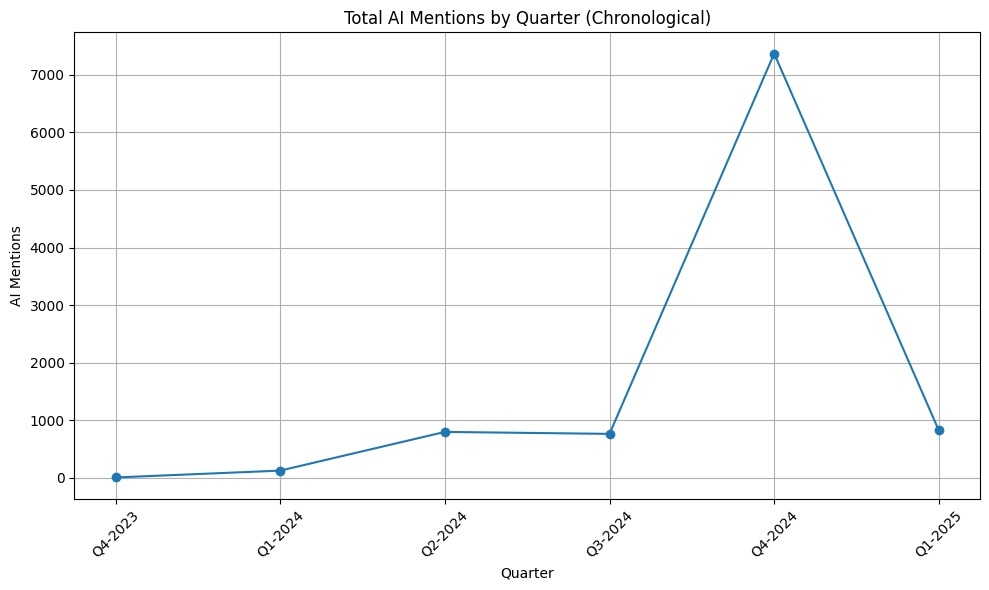

In [ ]:
import matplotlib.pyplot as plt

# Extract year and quarter number for proper sorting
quarterly_ai_mentions[["Q_Num", "Year"]] = quarterly_ai_mentions["Quarter"].str.extract(r"Q(\d)-(\d{4})").astype(int)

# Sort chronologically
quarterly_ai_mentions = quarterly_ai_mentions.sort_values(by=["Year", "Q_Num"])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    quarterly_ai_mentions["Quarter"],
    quarterly_ai_mentions["AI Mentions"],
    marker='o'
)
plt.xticks(rotation=45)
plt.title("Total AI Mentions by Quarter (Chronological)")
plt.xlabel("Quarter")
plt.ylabel("AI Mentions")
plt.grid(True)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

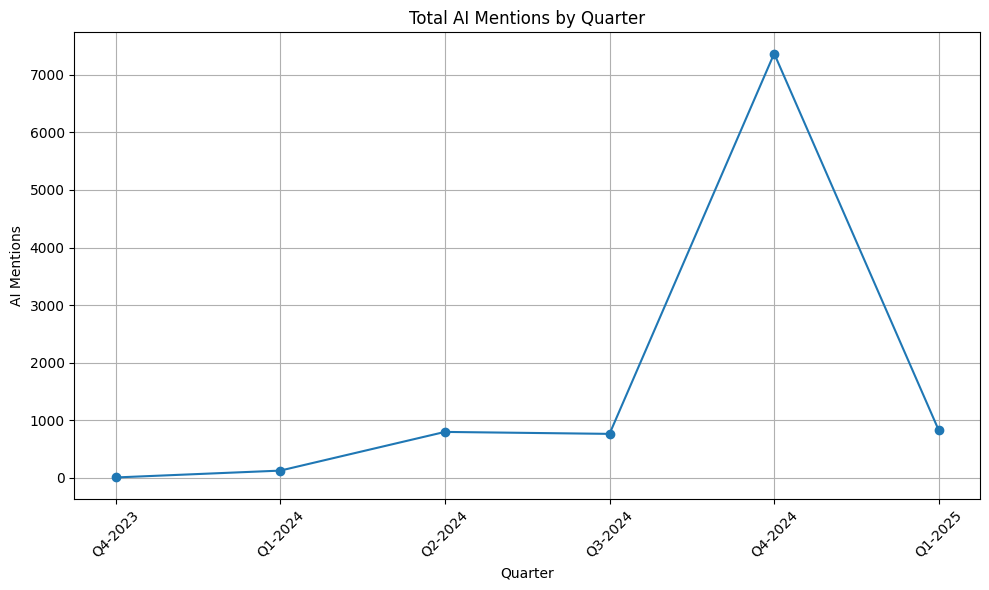

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(quarterly_ai_mentions["Quarter"], quarterly_ai_mentions["AI Mentions"], marker='o')
plt.xticks(rotation=45)
plt.title("Total AI Mentions by Quarter")
plt.xlabel("Quarter")
plt.ylabel("AI Mentions")
plt.grid(True)
plt.tight_layout()

# ✅ Save as PDF
plt.savefig("/content/quarterly_ai_mentions_plot.pdf")

# ✅ Download the PDF
from google.colab import files
files.download("/content/quarterly_ai_mentions_plot.pdf")

<ipython-input-25-cbd8f7a6dae6>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Quarter_dt"] = pd.to_datetime(df["Year"].astype(str) + "-Q" + df["Q"].astype(str))
<ipython-input-25-cbd8f7a6dae6>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grouped["Quarter_dt"] = pd.to_datetime(grouped["Year"].astype(str) + "-Q" + grouped["Q"].astype(str))
<ipython-input-25-cbd8f7a6dae6>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20c', num_lines)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

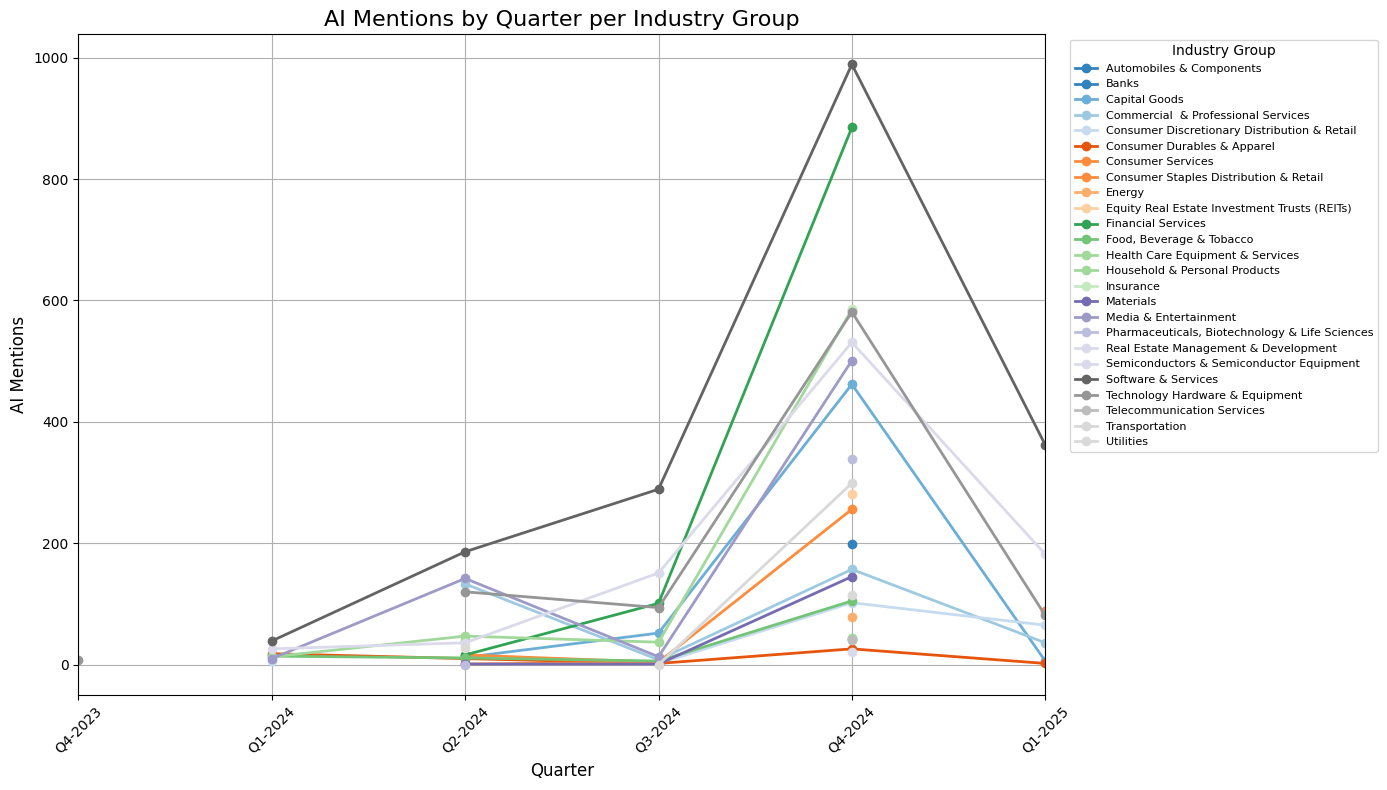

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 1. Prepare data with proper order
df = final_aimentions.copy()
df["Year"] = df["Quarter"].str.extract(r'(\d{4})').astype(int)
df["Q"] = df["Quarter"].str.extract(r'Q(\d)').astype(int)
df["Quarter_dt"] = pd.to_datetime(df["Year"].astype(str) + "-Q" + df["Q"].astype(str))
df_sorted = df.sort_values(["IndustryGroup", "Quarter_dt"])

# 2. Group & pivot
grouped = df_sorted.groupby(["Quarter", "IndustryGroup"])["AI Mentions"].sum().reset_index()
grouped["Year"] = grouped["Quarter"].str.extract(r'(\d{4})').astype(int)
grouped["Q"] = grouped["Quarter"].str.extract(r'Q(\d)').astype(int)
grouped["Quarter_dt"] = pd.to_datetime(grouped["Year"].astype(str) + "-Q" + grouped["Q"].astype(str))
grouped = grouped.sort_values("Quarter_dt")

pivot_df = grouped.pivot(index="Quarter_dt", columns="IndustryGroup", values="AI Mentions")

# 3. Colors
num_lines = pivot_df.shape[1]
cmap = cm.get_cmap('tab20c', num_lines)
colors = [cmap(i) for i in range(num_lines)]

# 4. Plot
plt.figure(figsize=(14, 8))
pivot_df.plot(figsize=(14, 8), marker='o', linewidth=2, color=colors)

plt.title("AI Mentions by Quarter per Industry Group", fontsize=16)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("AI Mentions", fontsize=12)
quarter_labels = [dt.strftime("Q{}-%Y").format((dt.month-1)//3 + 1) for dt in pivot_df.index]
plt.xticks(ticks=pivot_df.index, labels=quarter_labels, rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title="Industry Group", fontsize=8)
plt.tight_layout()

# 5. Save and download
plt.savefig("/content/industry_group_ai_mentions_sorted.pdf")
from google.colab import files
files.download("/content/industry_group_ai_mentions_sorted.pdf")

In [ ]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("/content/industry_quarterly_aimentions.csv")

# Convert Quarter string to datetime to enforce correct order
def quarter_to_date(q):
    qtr, year = q.split("-")
    month = {"Q1": 1, "Q2": 4, "Q3": 7, "Q4": 10}[qtr]
    return pd.Timestamp(year=int(year), month=month, day=1)

df["Quarter_dt"] = df["Quarter"].apply(quarter_to_date)

# Get top 10 industry groups by AI mentions
top10 = df.groupby("IndustryGroup")["AI Mentions"].sum().nlargest(10).index
df_top10 = df[df["IndustryGroup"].isin(top10)].copy()

# Use datetime for sorting and plotting
df_top10 = df_top10.sort_values("Quarter_dt")

# Plot using datetime for correct x-axis order
fig = px.line(
    df_top10,
    x="Quarter_dt",
    y="AI Mentions",
    color="IndustryGroup",
    markers=True,
    title="🧠 AI Mentions by Quarter (Top 10 Industry Groups)",
    labels={"Quarter_dt": "Quarter", "AI Mentions": "AI Mentions"},
    line_shape="linear"
)

# Replace x-axis tick labels with original Quarter string
tickvals = df_top10["Quarter_dt"].drop_duplicates()
ticktext = df_top10.drop_duplicates("Quarter_dt")["Quarter"]
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=tickvals,
        ticktext=ticktext
    ),
    xaxis_title="Quarter",
    yaxis_title="AI Mentions",
    legend_title_text="Industry Group",
    template="plotly_white",
    width=1100,
    height=650
)

fig.show()

In [ ]:
!pip install -U kaleido

In [ ]:
# Step 0: Install kaleido for saving Plotly figures as PDF
!pip install -U kaleido

# Step 1: Load data
import pandas as pd
import plotly.express as px

df = pd.read_csv("/content/industry_quarterly_aimentions.csv")

# Step 2: Convert "Quarter" to datetime for chronological sorting
def quarter_to_datetime(q):
    q_map = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}
    part = q.split("-")
    if len(part) == 2 and part[0] in q_map:
        return pd.to_datetime(f"{part[1]}-{q_map[part[0]]}")
    return pd.NaT

df["Quarter_dt"] = df["Quarter"].apply(quarter_to_datetime)

# Step 3: Filter top 10 industry groups
top10 = df.groupby("IndustryGroup")["AI Mentions"].sum().nlargest(10).index.tolist()
df_top10 = df[df["IndustryGroup"].isin(top10)]

# Step 4: Sort values for correct plotting
df_top10 = df_top10.sort_values("Quarter_dt")

# Step 5: Plot with Plotly
fig = px.line(
    df_top10,
    x="Quarter_dt",
    y="AI Mentions",
    color="IndustryGroup",
    markers=True,
    title="🧠 AI Mentions by Quarter (Top 10 Industry Groups)"
)

fig.update_layout(
    xaxis_title="Quarter",
    yaxis_title="AI Mentions",
    xaxis=dict(
        tickvals=df_top10["Quarter_dt"].unique(),
        ticktext=df_top10.sort_values("Quarter_dt")["Quarter"].unique(),
        tickangle=45
    ),
    width=1000,
    height=600,
    legend_title="Industry Group"
)

# Step 6: Save as PDF
fig.write_image("/content/top10_industry_ai_mentions.pdf")

# Step 7: Download the file
from google.colab import files
files.download("/content/top10_industry_ai_mentions.pdf")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
